# Lecture 05

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('tab10')

## Tree Model

### Decision Tree basics

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris_df = iris['frame']
display(iris_df.info(), iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


![](https://www.researchgate.net/profile/Wolfgang-Engelmann/publication/265877256/figure/fig3/AS:669555605114885@1536645904238/Flower-of-a-plant-with-peduncle-a-calyx-consisting-of-sepals-petals-stamen-and-in.png)

<AxesSubplot:xlabel='target', ylabel='count'>

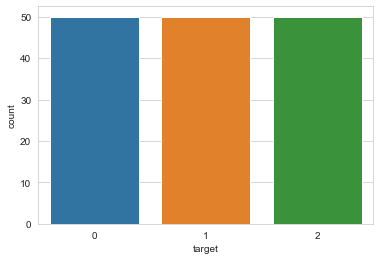

In [4]:
sns.countplot(data=iris_df, x='target', palette='tab10')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

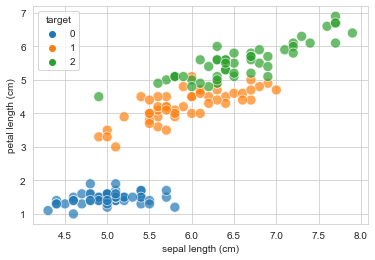

In [5]:
sns.scatterplot(
    data=iris_df,
    x='sepal length (cm)',
    y='petal length (cm)',
    hue='target',
    s=100,
    alpha=0.7,
    palette='tab10'
)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [8]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)# random_state=3110)

In [9]:
y_test.value_counts()

2    15
0    15
1    15
Name: target, dtype: int64

In [10]:
tree = DecisionTreeClassifier(
    max_depth=5,
    max_features=2
)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [11]:
y_pred = tree.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  71.11111111111111


In [12]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'),
    metrics.precision_score(y_test, y_pred, average='weighted'),
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.7064886911383018

0.7029761904761904

0.7111111111111111

In [13]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

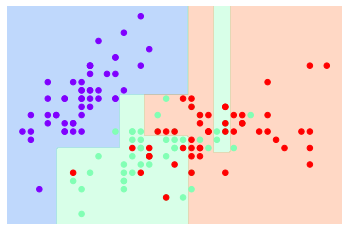

In [14]:
visualize_classifier(tree, X, y)

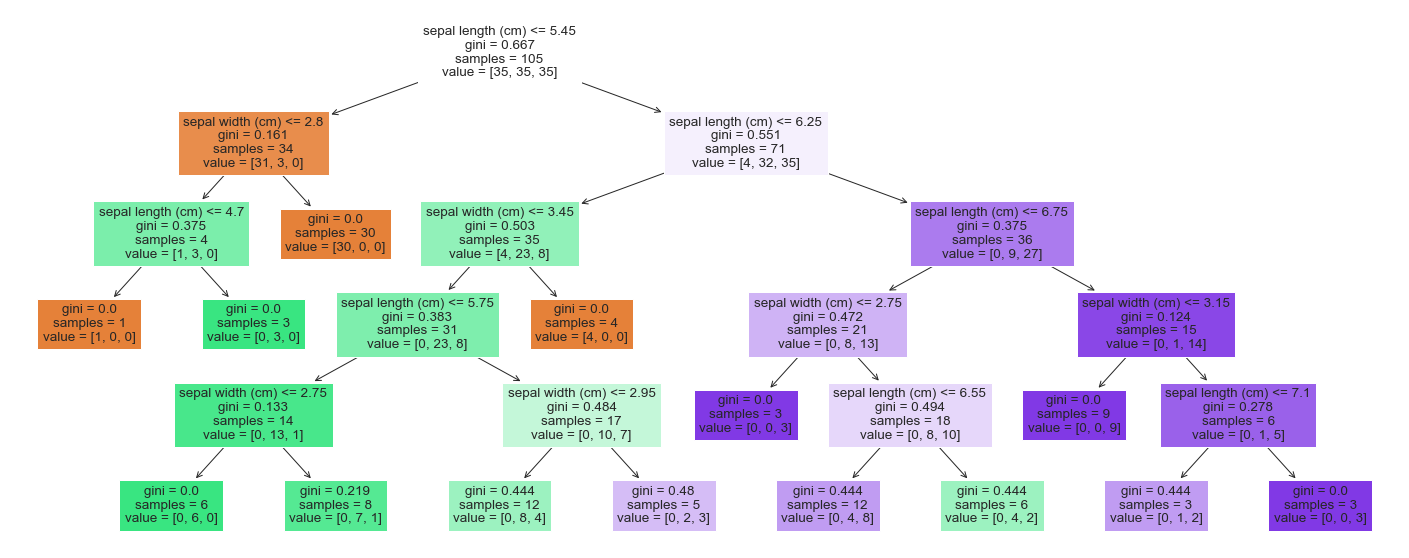

In [15]:
plt.figure(figsize=(25, 10))
_ = plot_tree(tree, feature_names=x_train.columns, max_depth=5, filled=True)

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
forest = RandomForestClassifier(
    #max_depth=5,
    #max_features=2
    #n_estimator= , gioi han so luong cay, mac dinh la 100
    #random_state= ,kiem soat yeu to ngau nhien
)

forest.fit(x_train, y_train)


RandomForestClassifier()

In [18]:
print(len(forest.estimators_))
forest.estimators_[:5]

100


[DecisionTreeClassifier(max_features='auto', random_state=690654650),
 DecisionTreeClassifier(max_features='auto', random_state=943453772),
 DecisionTreeClassifier(max_features='auto', random_state=116239125),
 DecisionTreeClassifier(max_features='auto', random_state=819003447),
 DecisionTreeClassifier(max_features='auto', random_state=1769328206)]

In [19]:
y_pred = forest.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  68.88888888888889


In [20]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'),
    metrics.precision_score(y_test, y_pred, average='weighted'),
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.6888888888888889

0.6888888888888889

0.6888888888888889

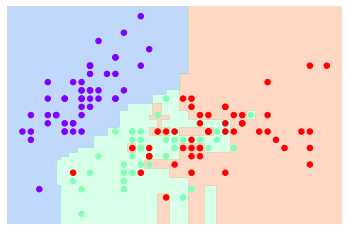

In [21]:
visualize_classifier(forest, X, y)

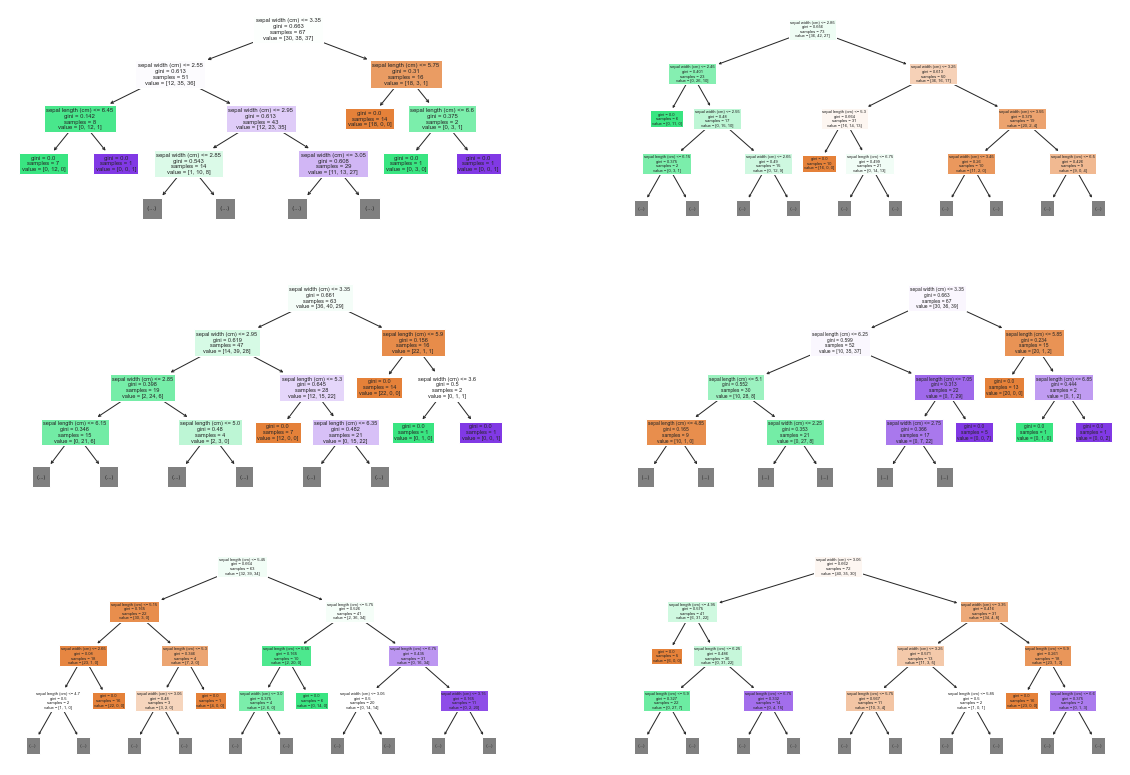

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(20, 14))

for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris_df.columns, max_depth=3, filled=True, ax=ax)

In [86]:
# Câu hỏi thảo luận

In [ ]:
forest = RandomForestClassifier(
    #max_depth=5, Log2(F-count) so luong bien su dung. Lua chon them 1 he so de dieu chinh 1 bien co duoc
    #lap lai tren nhieu node hay khong. Kinh nghiem: log2(max_feature) + 2
    #max_features=2, Thuong ko nen su dung duoi 15 (tuong ung 4 tang cay). 
    #n_estimator= , gioi han so luong cay, mac dinh la 100. (Total_feature - max_feature) Toi uu: To hop chap (max_feature cua Total_feature )
    #random_state= ,kiem soat yeu to ngau nhien
    #max_sample=0.8 #Dua vao so luong quan sat cua bo du lieu va bo nho may
)

## Support Vector Machines

<AxesSubplot:xlabel='target', ylabel='count'>

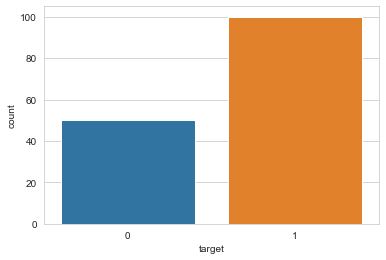

In [23]:
y_binary = y.gt(0).astype(int)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

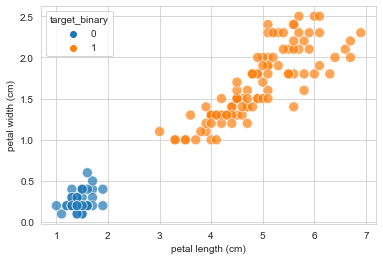

In [24]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [33]:
X, y = iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['target_binary']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [34]:
from sklearn.svm import SVC # Support Vector Classifier

svc = SVC(kernel='linear') # C = 1.0
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [35]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  100.0


In [131]:
# Decision Tree va Random Forest cho ket qua bao nhieu?

In [36]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

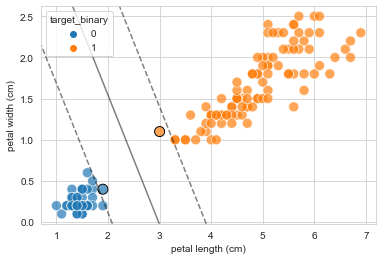

In [37]:
ax = sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [39]:
display(
    svc.decision_function(x_test),
    svc.predict(x_test)
)

array([ 2.72000003,  4.64000003,  5.45000003, -1.70999997, -1.48999997,
        1.93000003, -1.48999997,  2.40000003,  3.26000003,  2.76000003,
        4.13000003,  2.72000003, -2.03999997, -1.37999997,  4.24000003,
        1.85000003, -1.70999997, -1.52999997, -1.37999997, -1.37999997,
       -1.26999997,  4.05000003,  2.03000003, -1.66999997,  2.83000003,
        3.01000003, -1.48999997, -1.59999997,  1.49000003,  2.69000003,
        1.05000003,  3.37000003,  4.46000003, -1.59999997, -1.52999997,
        2.72000003,  4.56000003,  1.59000003])

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [149]:
svc.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

### Beyond linear boundaries: Kernel SVM

<AxesSubplot:xlabel='target', ylabel='count'>

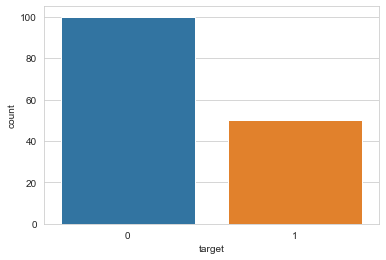

In [41]:
y_binary = iris_df['target'].gt(1).astype(int)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

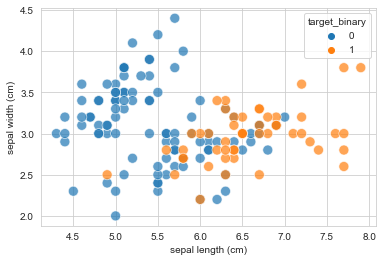

In [42]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [43]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state =420)

In [44]:
svc = SVC(kernel='linear') # C = 1.0
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  86.8421052631579


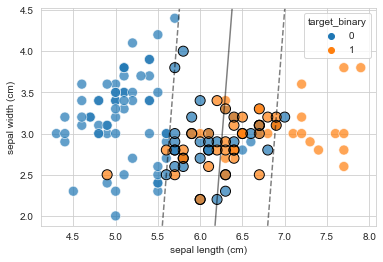

In [47]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [50]:
svc = SVC(kernel='rbf') # C = 1.0
svc.fit(x_train, y_train)

SVC()

In [51]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  81.57894736842105


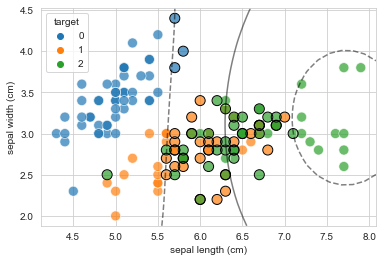

In [52]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

### Tuning the SVM: Softening Margins

In [53]:
svc = SVC(kernel='rbf', C=100) # C = 100.0
svc.fit(x_train, y_train)

SVC(C=100)

In [54]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  84.21052631578947


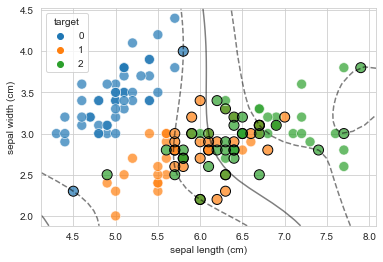

In [55]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

## Regularization Linear Model

## Model Validation & Cross Validation

In [232]:
from sklearn.model_selection import train_test_split, KFold

In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
tree = DecisionTree()